## Introduction to Seurat:
In the project, you will predominantly use Seurat, an R package that combines many functionalities for the
analysis of single-cell data. For the initial steps, you can find helpful documentation here. They will be explicitly
mentioned if other packages are required for specific tasks.

Before you start programming, you should set up the system as follows:

## System-setup:
1. Install Conda

2. Install all packages using the provided environment.yml file. [Mac users: delete singleR line from the
.yml file before running the following command]
conda env create -f environment.yml

3. Start the conda environment with:
conda activate single-cell

4. Install CellChat by starting R and install CellChat using devtools
devtools::install_github("sqjinCellChat")

If you are using a Mac, delete the line for singleR from environment.yml file and manually install
SingleR using the following commands in R:

```R 
if (!require("BiocManager", quietly = TRUE))

install.packages("BiocManager")

BiocManager::install("SingleR")
```


5. If you have problems with Seurat’s clustering functions, please try to downgrade Matrix and spatstat.core
packages.

`remove.packages(grep("spatstat", installed.packages(), value = T))`

`devtools::install_version("spatstat", version = "2.4.4")`

`install.packages("Matrix", ".", type = "source", repos = "http://R-Forge.R-p6.`

 Test if you have installed all necessary libraries:

```R 
suppressPackageStartupMessages({
library(dplyr)
library(spatstat.core)
library(Seurat)
library(patchwork)
library(DoubletFinder)
library(SingleR)
library(enrichR)
library(CellChat)
library(SingleCellExperiment)
library(SeuratWrappers)
library(tidyverse)
library(monocle3)
library(celldex)
})
```

In [2]:
library(dplyr)
# library(spatstat.core)
library(Seurat)
library(patchwork)
library(DoubletFinder)
library(SingleR)
# library(enrichR)
library(CellChat)
library(SingleCellExperiment)
library(SeuratWrappers)
library(tidyverse)
# library(monocle3)
# library(celldex)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp

'SeuratObject' was built under R 4.4.0 but the current version is
4.4.2; it is recomended that you reinstall 'SeuratObject' as the ABI
for R may have changed

'SeuratObject' was built with package 'Matrix' 1.7.0 but the current
version is 1.7.1; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count



Attaching package: 'MatrixGenerics'


The follo

## Download the data:
You can download the dataset for this project under the following link: [https://icbb-share.s3.eucentral-1.amazonaws.com/single-cell-bioinformatics/scbi_ds1.zip](https://icbb-share.s3.eu-central-1.amazonaws.com/single-cell-bioinformatics/scbi_ds1.zip) The file contains the data of four samples:
BMMC_D1T1, BMMC_D1T2, CD34_D2T1 and CD34_D3T1, with separate expression matrices for each sample.

## Week 1: (5 Points)
### 1 Loading the Data (1P)
Load the expression matrices from the dataset and construct a Seurat object. You will need to load two files: one
containing data on Bone Marrow Mononuclear Cells (BMMC) and the other on CD34+ Enriched Bone Marrow
Cells (CD34).

In [3]:
# Load the data on Bone Marrow Mononuclear Cells (BMMC) Cells
BMMC_D1T1 <- readRDS("scbi_ds1/GSM4138872_scRNA_BMMC_D1T1.rds")
BMMC_D1T2 <- readRDS("scbi_ds1/GSM4138873_scRNA_BMMC_D1T2.rds")
# Load the data on CD34+ Cells
CD34_D2T1 <- readRDS("scbi_ds1/GSM4138874_scRNA_CD34_D2T1.rds")
CD34_D3T1 <- readRDS("scbi_ds1/GSM4138875_scRNA_CD34_D3T1.rds")


In [4]:
# Create Seurat objects for each sample
BMMC_D1T1 <- CreateSeuratObject(BMMC_D1T1, project = "BMMC_D1T1")
BMMC_D1T2 <- CreateSeuratObject(BMMC_D1T2, project = "BMMC_D1T2")
CD34_D2T1 <- CreateSeuratObject(CD34_D2T1, project = "CD34_D2T1")
CD34_D3T1 <- CreateSeuratObject(CD34_D3T1, project = "CD34_D3T1")

I create a metadata data frame based on the "Table 1".

In [5]:
# Create metadata dataframe
metadata <- data.frame(
  Sample = c("BMMC_D1T1", "BMMC_D1T2", "CD34_D2T1", "CD34_D3T1"),
  Donor = c("D1", "D1", "D2", "D3"),
  Replicate = c("T1", "T2", "T1", "T1"),
  Sex = c("F", "F", "M", "F")
)

metadata


Sample,Donor,Replicate,Sex
<chr>,<chr>,<chr>,<chr>
BMMC_D1T1,D1,T1,F
BMMC_D1T2,D1,T2,F
CD34_D2T1,D2,T1,M
CD34_D3T1,D3,T1,F


### 2 Create the sample sheet (1P)
Question: Label each sample with the corresponding metadata from Table 1.

I add the metadata information for each sample to the respective Seurat object.

In [6]:
# Add metadata to each Seurat object
BMMC_D1T1$Donor <- "D1"
BMMC_D1T1$Replicate <- "T1"
BMMC_D1T1$Sex <- "F"

BMMC_D1T2$Donor <- "D1"
BMMC_D1T2$Replicate <- "T2"
BMMC_D1T2$Sex <- "F"

CD34_D2T1$Donor <- "D2"
CD34_D2T1$Replicate <- "T1"
CD34_D2T1$Sex <- "M"

CD34_D3T1$Donor <- "D3"
CD34_D3T1$Replicate <- "T1"
CD34_D3T1$Sex <- "F"


### Add Meta-data (3P)
For each sample report the following information:
1. How many cells are in each sample?

In [7]:
cat("BMMC_D1T1:", ncol(BMMC_D1T1), "cells\n")
cat("BMMC_D1T2:", ncol(BMMC_D1T2), "cells\n")
cat("CD34_D2T1:", ncol(CD34_D2T1), "cells\n")
cat("CD34_D3T1:", ncol(CD34_D3T1), "cells\n")

BMMC_D1T1: 6270 cells
BMMC_D1T2: 6332 cells
CD34_D2T1: 2424 cells
CD34_D3T1: 5752 cells


2. How many genes are in the expression matrices?

In [8]:
cat("BMMC_D1T1:", nrow(BMMC_D1T1), "genes\n")
cat("BMMC_D1T2:", nrow(BMMC_D1T2), "genes\n")
cat("CD34_D2T1:", nrow(CD34_D2T1), "genes\n")
cat("CD34_D3T1:", nrow(CD34_D3T1), "genes\n")

BMMC_D1T1: 20287 genes
BMMC_D1T2: 20287 genes
CD34_D2T1: 20287 genes
CD34_D3T1: 20287 genes


3. What information is now part of the meta-data of the objects?

In [9]:
# View metadata
head(BMMC_D1T1@meta.data)
head(BMMC_D1T2@meta.data)
head(CD34_D2T1@meta.data)
head(CD34_D3T1@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,Donor,Replicate,Sex
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
BMMC_D1T1:AAACCCAAGATGCAGC-1,BMMC,2433,1352,D1,T1,F
BMMC_D1T1:AAACCCACAAACTCGT-1,BMMC,5106,2001,D1,T1,F
BMMC_D1T1:AAACCCACAGTGTACT-1,BMMC,3589,1441,D1,T1,F
BMMC_D1T1:AAACCCATCGCTATTT-1,BMMC,3603,1809,D1,T1,F
BMMC_D1T1:AAACGAACACCCAATA-1,BMMC,2065,1106,D1,T1,F
BMMC_D1T1:AAACGAACAGCAGTCC-1,BMMC,2783,1380,D1,T1,F


,orig.ident,nCount_RNA,nFeature_RNA,Donor,Replicate,Sex
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
BMMC_D1T2:AAACCCACATGGCCAC-1,BMMC,4074,1834,D1,T2,F
BMMC_D1T2:AAACCCAGTCCTCATC-1,BMMC,1601,945,D1,T2,F
BMMC_D1T2:AAACCCAGTCGCATTA-1,BMMC,2249,1265,D1,T2,F
BMMC_D1T2:AAACCCAGTGGGTCAA-1,BMMC,2489,1325,D1,T2,F
BMMC_D1T2:AAACCCATCAGACATC-1,BMMC,1871,1034,D1,T2,F
BMMC_D1T2:AAACCCATCATTACGG-1,BMMC,1427,861,D1,T2,F


,orig.ident,nCount_RNA,nFeature_RNA,Donor,Replicate,Sex
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
CD34_D2T1:AAACCTGAGTATCGAA-1,CD34,8303,3187,D2,T1,M
CD34_D2T1:AAACCTGAGTCGTTTG-1,CD34,3917,1787,D2,T1,M
CD34_D2T1:AAACCTGGTTCCACAA-1,CD34,6023,2552,D2,T1,M
CD34_D2T1:AAACGGGAGCTTCGCG-1,CD34,4493,2191,D2,T1,M
CD34_D2T1:AAACGGGAGGGAGTAA-1,CD34,5190,2322,D2,T1,M
CD34_D2T1:AAACGGGAGTTACGGG-1,CD34,4634,2152,D2,T1,M


,orig.ident,nCount_RNA,nFeature_RNA,Donor,Replicate,Sex
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
CD34_D3T1:AAACCTGAGAAGGGTA-1,CD34,1419,816,D3,T1,F
CD34_D3T1:AAACCTGAGACAAAGG-1,CD34,2470,1360,D3,T1,F
CD34_D3T1:AAACCTGAGGCATGTG-1,CD34,3909,1826,D3,T1,F
CD34_D3T1:AAACCTGAGGGCTCTC-1,CD34,2894,1527,D3,T1,F
CD34_D3T1:AAACCTGCAAGTAGTA-1,CD34,3775,1923,D3,T1,F
CD34_D3T1:AAACCTGCACAGTCGC-1,CD34,3094,1638,D3,T1,F


## Week 2: (15 Points)
### 4 Preprocessing (10P)
#### 4.1 Preprocessing (7P)
Bring the following preprocessing steps into the correct order and perform them on your data.
1. Filtering
2. Doublet removal (DoubletFinder)
3. Normalization
4. Feature Selection
Which steps do you perform before and after merging (task: 4.2) and why?
Filtering: Perform Filtering on the data to remove low-quality cells. Name the parameters that have been used
for filtering. Argue why you have used them and how you have chosen the cut-off parameters.
Doublet-Removal with DoubletFinder: Estimate the optimal value for pK and perform the Doublet Detection.
Explain why we perform doublet removal.
Normalization and Feature Selection: Perform Normalization and Feature Selection on your data. Which
Normalization method is used by the

#### Answer
Step 1: Filtering

Filtering is typically done to remove low-quality cells based on criteria such as:

Minimum number of genes detected per cell to filter out low-quality cells or empty droplets.

Maximum number of genes to remove potential doublets or highly stressed cells.

Percentage of mitochondrial genes to filter out dead or damaged cells.

Here’s how to apply these filters in Seurat:

In [10]:
# Define filtering criteria
min_genes <- 200  # Minimum number of genes for a cell to be considered valid
max_genes <- 2500  # Maximum number of genes to filter out potential doublets or stressed cells

# Filter cells based on number of genes
BMMC_D1T1 <- subset(BMMC_D1T1, subset = nFeature_RNA > min_genes & nFeature_RNA < max_genes)
BMMC_D1T2 <- subset(BMMC_D1T2, subset = nFeature_RNA > min_genes & nFeature_RNA < max_genes)
CD34_D2T1 <- subset(CD34_D2T1, subset = nFeature_RNA > min_genes & nFeature_RNA < max_genes)
CD34_D3T1 <- subset(CD34_D3T1, subset = nFeature_RNA > min_genes & nFeature_RNA < max_genes)


**Name the parameters that have been used for filtering.**
nFeature_RNA

**Argue why you have used them and how you have chosen the cut-off parameters**
Because this is a feauture that we have access on that. TODO TODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODO

***

Step 2: Doublet Removal (DoubletFinder)

Doublets are cells that contain RNA from multiple cells, which can distort the analysis. DoubletFinder estimates the probability of doublets in single-cell RNA-seq data.

To use DoubletFinder, first perform principal component analysis (PCA), then estimate the pK value (optimal parameter) and remove doublets:

[1] "------------------------------ Sample BMMC_D1T1 ------------------------------"


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  CD3E, LTB, CD3D, NPM1, KLF2, IL32, IL7R, CD69, CD7, CD3G 
	   HSPA8, TCF7, PTMA, GYPC, CD27, SPOCK2, PIK3IP1, RHOH, LEF1, CD2 
	   CD247, IFITM1, ARL4C, CD81, CCR7, CD6, GZMM, BCL11B, FLT3LG, ZAP70 
Negative:  CST3, LYZ, S100A9, S100A8, FCN1, MNDA, VCAN, TYROBP, GRN, MS4A6A 
	   S100A12, FCER1G, LGALS1, CD14, CSTA, PLAUR, S100A11, TYMP, CYBB, SERPINA1 
	   LST1, CFD, PSAP, SPI1, CTSS, CEBPD, APLP2, CD68, CD36, MPEG1 
PC_ 2 
Positive:  JUNB, CD3E, CD3D, IL32, S100A6, CD7, CD3G, IL7R, S100A10, KLF2 
	   TNFAIP3, COTL1, SLC2A3, LTB, CD2, ARL4C, SPOCK2, CD27, S100A4, TCF7 
	   CD247, PIK3IP1, GZMM, CD6, IFITM1, ANXA1, FTH1, DUSP2, BCL11B, DOK2 
Negative:  STMN1, MZB1, SOX4, SPIB, TCF4, IGLL1, FAM129C, VPREB3, HLA-DRA, CD79B 
	   BCL7A, TYMS, VPREB1, CD79A, YBX3, CD74, PLD4, MYBL2, IRF4, TSPAN13 
	   ITM2C, IGLL5, HLA-DPB1, TCL1A, MME, CXXC5, CD9, NREP, HLA-DPA1, TUBB 

[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


Loading required package: ROCR



NULL
[1] "Creating 1901 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."
[1] "------------------------------ Sample BMMC_D1T2 ------------------------------"


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  CST3, LYZ, S100A9, S100A8, FCN1, MNDA, VCAN, TYROBP, GRN, MS4A6A 
	   CSTA, S100A12, FCER1G, LGALS1, CD14, S100A11, CYBB, PLAUR, LST1, SERPINA1 
	   TYMP, CFD, SPI1, APLP2, CEBPD, CTSS, MPEG1, PSAP, FGL2, TNFSF13B 
Negative:  CD3E, LTB, CD3D, KLF2, IL32, CD7, IL7R, CD69, CD3G, TCF7 
	   PIK3IP1, CD27, GYPC, PTMA, LEF1, SPOCK2, CD247, NOSIP, CD2, ARL4C 
	   IFITM1, CD6, CCR7, BCL11B, TRABD2A, CD81, FLT3LG, GZMM, ITM2A, RORA 
PC_ 2 
Positive:  JUNB, CD3E, CD3D, IL32, S100A6, CD7, S100A10, CD3G, IL7R, SLC2A3 
	   COTL1, KLF2, TNFAIP3, ARL4C, LTB, TCF7, CD247, CD27, SPOCK2, CD2 
	   S100A4, PIK3IP1, FTH1, IFITM1, CD6, BCL11B, SOCS3, GZMM, FLT3LG, DUSP2 
Negative:  STMN1, SOX4, MZB1, IGLL1, TCF4, SPIB, VPREB3, CD79B, FAM129C, BCL7A 
	   HLA-DRA, YBX3, VPREB1, TYMS, TCL1A, ITM2C, MME, MYBL2, IRF4, CD79A 
	   PLD4, TUBB, CXXC5, IGLL5, TSPAN13, NREP, HLA-DPB1, BCL11A, CD7

[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


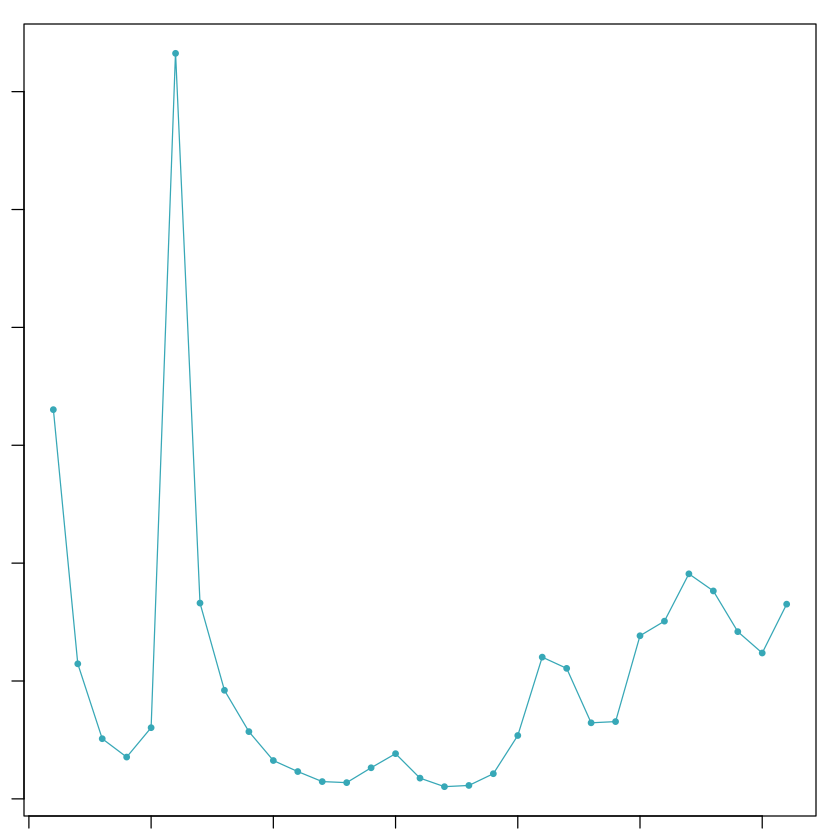

NULL
[1] "Creating 1924 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."
[1] "------------------------------ Sample CD34_D2T1 ------------------------------"


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  VPREB1, VPREB3, CXCR4, ARPP21, AKAP12, CD79A, DNTT, CD79B, MZB1, BLNK 
	   MME, CD9, PTPRE, TCF4, EBF1, IGLL1, LINC01013, FAM129C, PPP1R14B, ISG20 
	   HMHB1, PAG1, CD74, NEIL1, CMTM7, LTB, HLA-DMB, IRF7, NCF1, IRF8 
Negative:  EEF1B2, SERPINB1, PRSS57, CYTL1, AIF1, SPINK2, CRHBP, AVP, ICAM3, LYL1 
	   BEX2, HOPX, MLLT3, FAM117A, CD164, HINT1, ANXA1, LAPTM4B, ENO1, SLC40A1 
	   BST2, MSRB3, IDS, GATA2, ZFAS1, FOS, FTL, CRYGD, TESPA1, LIMS1 
PC_ 2 
Positive:  VPREB3, CD79B, AKAP12, ARPP21, CD9, VPREB1, SOCS2, CD79A, DNTT, LINC01013 
	   MME, EBF1, RCSD1, NEIL1, LAPTM5, ZCCHC7, SSBP2, HMHB1, CMTM7, ISG20 
	   GLRX, LINC00114, CMTM8, LHPP, MLXIP, P4HA2, MPP1, RAG1, LEF1, TSPAN14 
Negative:  IRF8, LILRB4, SPIB, LILRA4, TGFBI, RNASE6, SCT, FCER1G, LGALS1, CCDC50 
	   SAMHD1, UGCG, PLD4, IRF7, IL3RA, TYROBP, C12orf75, SERPINF1, PTPRS, CLEC4C 
	   CST3, SMPD3, HCST, FCRL

[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


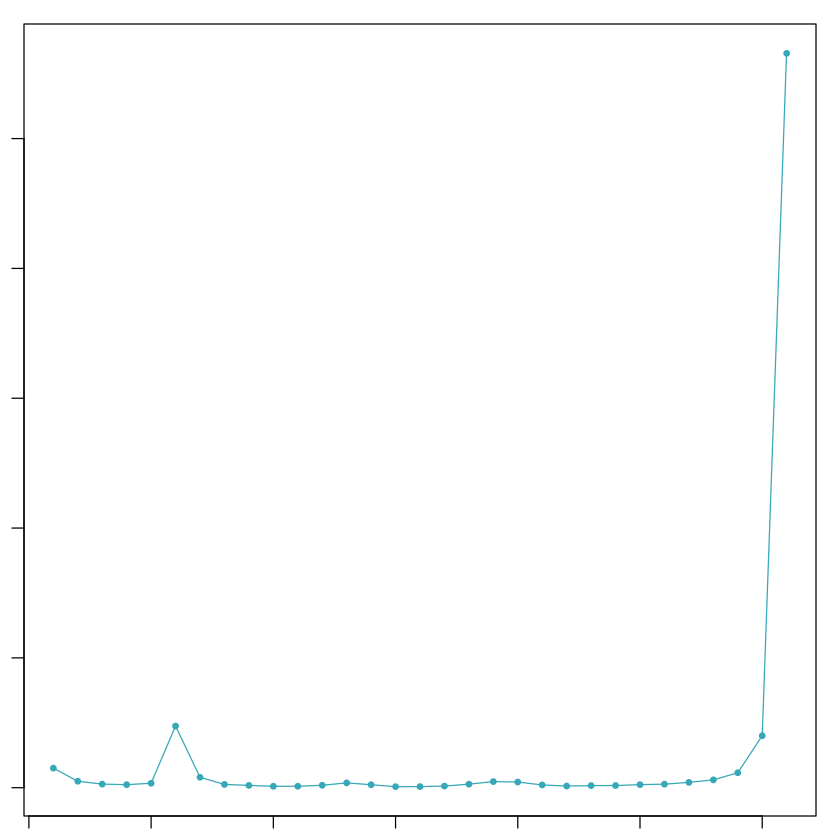

NULL
[1] "Creating 514 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."
[1] "------------------------------ Sample CD34_D3T1 ------------------------------"


Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  TMSB4X, LGALS1, CYBA, VIM, IRF8, CORO1A, SAMHD1, ANXA2, C12orf75, CD74 
	   FCER1G, DBI, LYZ, TMSB10, S100A10, TYROBP, RNASE6, HLA-DMB, HLA-B, HLA-DRA 
	   IGSF6, CXCR4, HLA-DPA1, MKI67, GPR183, PLAC8, HLA-DPB1, LY86, CALM1, MNDA 
Negative:  CYTL1, CNRIP1, ALDH1A1, HBD, KLF1, APOC1, SLC40A1, TPM1, LEPROT, FHL2 
	   MLLT3, MYC, CA1, HBB, TSC22D1, NFIA, SMIM1, FAM117A, GATA2, GATA1 
	   PDZD8, LIMS1, CD164, SMIM10, SERPINB1, ANK1, TFR2, ITGA2B, IL1B, REXO2 
PC_ 2 
Positive:  HOPX, SPINK2, TMSB4X, CRHBP, AVP, HLA-DRA, CD74, ACTG1, VIM, GLIPR1 
	   SELL, EVI2B, IDS, CD52, ITM2C, MEG3, HLA-DPB1, JUN, HLA-B, TSC22D3 
	   NRIP1, DUSP1, SORL1, HIST1H2BK, PCDH9, MSI2, ANKRD28, FOS, RCSD1, KLF6 
Negative:  TYMS, TUBA1B, H2AFZ, TUBB, APOC1, CKS1B, HBD, PCNA, HMGB1, DNAJC9 
	   HMGB2, TOP2A, HIST1H4C, BLVRB, NUSAP1, CENPF, RAN, ZWINT, CA1, UBE2C 
	   KLF1, HNRNPAB, STMN1, SMC

[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


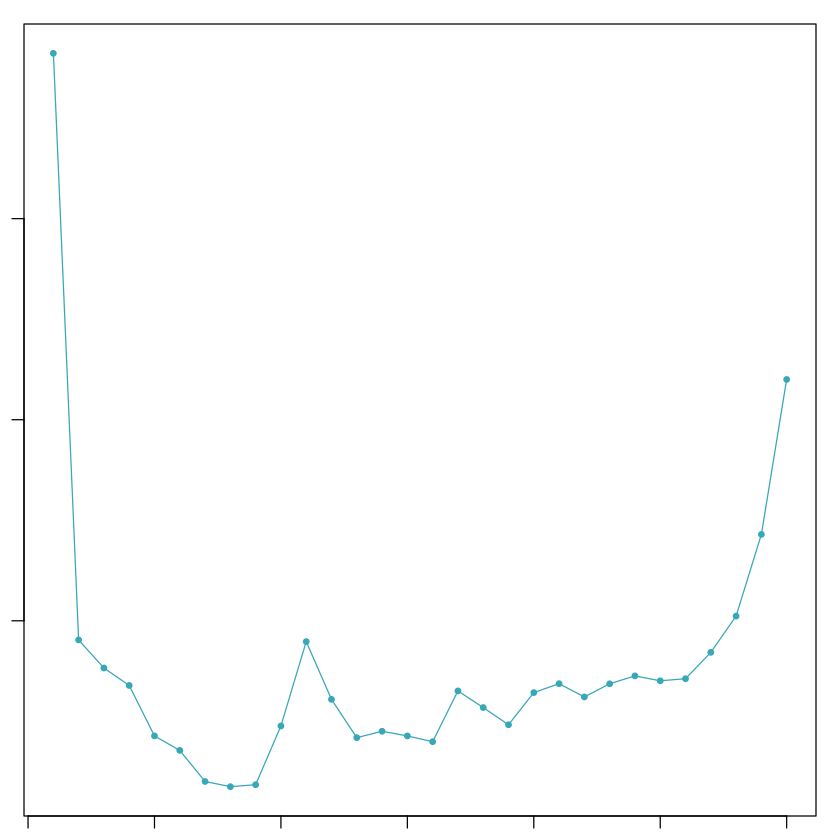

NULL
[1] "Creating 1789 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


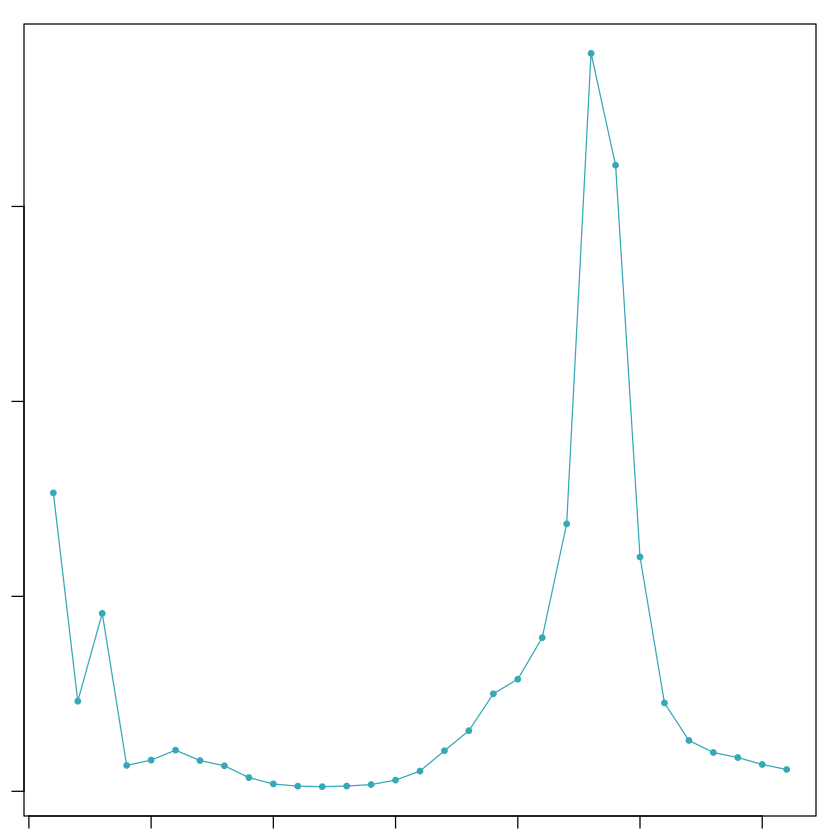

In [18]:
################################################# Sample BMMC_D1T1 #################################################
print("------------------------------ Sample BMMC_D1T1 ------------------------------")

BMMC_D1T1 <- NormalizeData(BMMC_D1T1)
BMMC_D1T1 <- FindVariableFeatures(BMMC_D1T1)
BMMC_D1T1 <- ScaleData(BMMC_D1T1)
BMMC_D1T1 <- RunPCA(BMMC_D1T1)

# Estimation of pK value
sweep_res <- paramSweep(BMMC_D1T1, PCs = 1:10)
sweep_stats <- summarizeSweep(sweep_res, GT = FALSE)
pk_optimal <- find.pK(sweep_stats)  # Choose the pK with maximum BCmetric value

# Define parameters for DoubletFinder
pK_value <- as.numeric(pk_optimal$pK[which.max(pk_optimal$BCmetric)])  # Replace with calculated optimal value
nExp_poi <- round(0.05 * ncol(BMMC_D1T1))  # A typical rate is 5%, so we calculate it as 5% of the total number of cells in the sample.

# Run DoubletFinder
BMMC_D1T1 <- doubletFinder(BMMC_D1T1, PCs = 1:10, pN = 0.25, pK = pK_value, nExp = nExp_poi)

################################################# Sample BMMC_D1T2 #################################################
print("------------------------------ Sample BMMC_D1T2 ------------------------------")

BMMC_D1T2 <- NormalizeData(BMMC_D1T2)
BMMC_D1T2 <- FindVariableFeatures(BMMC_D1T2)
BMMC_D1T2 <- ScaleData(BMMC_D1T2)
BMMC_D1T2 <- RunPCA(BMMC_D1T2)

# Estimation of pK value
sweep_res <- paramSweep(BMMC_D1T2, PCs = 1:10)
sweep_stats <- summarizeSweep(sweep_res, GT = FALSE)
pk_optimal <- find.pK(sweep_stats)  # Choose the pK with maximum BCmetric value

# Define parameters for DoubletFinder
pK_value <- as.numeric(pk_optimal$pK[which.max(pk_optimal$BCmetric)])  # Replace with calculated optimal value
nExp_poi <- round(0.05 * ncol(BMMC_D1T2))  # A typical rate is 5%, so we calculate it as 5% of the total number of cells in the sample.

# Run DoubletFinder
BMMC_D1T2 <- doubletFinder(BMMC_D1T2, PCs = 1:10, pN = 0.25, pK = pK_value, nExp = nExp_poi)

################################################# Sample CD34_D2T1 #################################################
print("------------------------------ Sample CD34_D2T1 ------------------------------")

CD34_D2T1 <- NormalizeData(CD34_D2T1)
CD34_D2T1 <- FindVariableFeatures(CD34_D2T1)
CD34_D2T1 <- ScaleData(CD34_D2T1)
CD34_D2T1 <- RunPCA(CD34_D2T1)

# Estimation of pK value
sweep_res <- paramSweep(CD34_D2T1, PCs = 1:10)
sweep_stats <- summarizeSweep(sweep_res, GT = FALSE)
pk_optimal <- find.pK(sweep_stats)  # Choose the pK with maximum BCmetric value

# Define parameters for DoubletFinder
pK_value <- as.numeric(pk_optimal$pK[which.max(pk_optimal$BCmetric)])  # Replace with calculated optimal value
nExp_poi <- round(0.05 * ncol(CD34_D2T1))  # A typical rate is 5%, so we calculate it as 5% of the total number of cells in the sample.

# Run DoubletFinder
CD34_D2T1 <- doubletFinder(CD34_D2T1, PCs = 1:10, pN = 0.25, pK = pK_value, nExp = nExp_poi)

################################################# Sample CD34_D3T1 #################################################
print("------------------------------ Sample CD34_D3T1 ------------------------------")

CD34_D3T1 <- NormalizeData(CD34_D3T1)
CD34_D3T1 <- FindVariableFeatures(CD34_D3T1)
CD34_D3T1 <- ScaleData(CD34_D3T1)
CD34_D3T1 <- RunPCA(CD34_D3T1)

# Estimation of pK value
sweep_res <- paramSweep(CD34_D3T1, PCs = 1:10)
sweep_stats <- summarizeSweep(sweep_res, GT = FALSE)
pk_optimal <- find.pK(sweep_stats)  # Choose the pK with maximum BCmetric value

# Define parameters for DoubletFinder
pK_value <- as.numeric(pk_optimal$pK[which.max(pk_optimal$BCmetric)])  # Replace with calculated optimal value
nExp_poi <- round(0.05 * ncol(CD34_D3T1))  # A typical rate is 5%, so we calculate it as 5% of the total number of cells in the sample.

# Run DoubletFinder
CD34_D3T1 <- doubletFinder(CD34_D3T1, PCs = 1:10, pN = 0.25, pK = pK_value, nExp = nExp_poi)



**Explain why we perform doublet removal?**
These doublets can confuse the analysis because they contain mixed RNA from different cells. DoubletFinder is a tool designed to identify and remove these doublets from your dataset.

**Which steps do you perform before and after merging (task: 4.2) and why?**

Filtering and Doublet Removal are performed on each individual dataset before merging to ensure data quality. 

Normalization and Feature Selection can be performed after merging to standardize expression across the combined dataset. This sequence helps avoid introducing artifacts due to batch effects or low-quality cells in merged data.

***

Step 3: Normalization

Normalization scales the gene expression values across cells to account for differences in sequencing depth and allows for meaningful comparisons.

In [19]:
# Normalize data for each sample
BMMC_D1T1 <- NormalizeData(BMMC_D1T1)
BMMC_D1T2 <- NormalizeData(BMMC_D1T2)
CD34_D2T1 <- NormalizeData(CD34_D2T1)
CD34_D3T1 <- NormalizeData(CD34_D3T1)


Normalizing layer: counts

Normalizing layer: counts

Normalizing layer: counts

Normalizing layer: counts



Default Seurat Method: **LogNormalize**, which normalizes gene expression values by the total expression and scales by a factor of 10,000.

***

Step 2: Feature Selection

Feature selection identifies highly variable genes, which are often the most informative genes for distinguishing cell types.

In [20]:
# Find variable features
BMMC_D1T1 <- FindVariableFeatures(BMMC_D1T1)
BMMC_D1T2 <- FindVariableFeatures(BMMC_D1T2)
CD34_D2T1 <- FindVariableFeatures(CD34_D2T1)
CD34_D3T1 <- FindVariableFeatures(CD34_D3T1)


Finding variable features for layer counts



Finding variable features for layer counts

Finding variable features for layer counts

Finding variable features for layer counts



**Purpose of Feature Selection:** To focus on genes that provide the most biological signal.

**How Features are Selected:** By identifying genes with high variance across cells, which are informative for downstream analysis.

***

#### 4.2 Batch-Correction (3P)
1. Merge all four samples into one dataset without performing batch correction.
2. Merge all four samples into one dataset using Seurat’s Data Integration method as Batch Correction.

Compare the outcomes of A and B.

Is Batch-Correction necessary? If yes, name the parameters and explain (with the necessary plots) why a correction for this parameter may be necessary.

In [21]:
# A:
# Merge the samples without batch correction
merged_no_correction <- merge(BMMC_D1T1, y = c(BMMC_D1T2, CD34_D2T1, CD34_D3T1), 
                              add.cell.ids = c("BMMC_D1T1", "BMMC_D1T2", "CD34_D2T1", "CD34_D3T1"), 
                              project = "Merged_No_Correction")


In [22]:
# B:
# create a list of Seurat objects to integrate
sample_list <- list(BMMC_D1T1, BMMC_D1T2, CD34_D2T1, CD34_D3T1)

# Find integration anchors
anchors <- FindIntegrationAnchors(object.list = sample_list, dims = 1:20)

# Integrate the data using the anchors
merged_with_correction <- IntegrateData(anchorset = anchors, dims = 1:20)

Computing 2000 integration features

Scaling features for provided objects

Warning message:
"Different features in new layer data than already exists for scale.data"
Warning message:
"Different features in new layer data than already exists for scale.data"
Warning message:
"Different features in new layer data than already exists for scale.data"
Warning message:
"Different features in new layer data than already exists for scale.data"
Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 14395 anchors

Filtering anchors

	Retained 8772 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5046 anchors

Filtering anchors

	Retained 2276 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5066 anchors

Filtering anchors

	Retained 2332 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9075 anchors

Filtering anchors

	Retained 2460 an

**Compare the Outcomes:**

**Is Batch-Correction necessary? If yes, name the parameters and explain (with the necessary plots) why a correction for this parameter may be necessary.**

In [23]:
# Perform PCA and UMAP on the non-corrected merged object
merged_no_correction <- ScaleData(merged_no_correction)
merged_no_correction <- RunPCA(merged_no_correction)
merged_no_correction <- RunUMAP(merged_no_correction, dims = 1:30)

# Perform PCA and UMAP on the batch-corrected merged object
merged_with_correction <- ScaleData(merged_with_correction)
merged_with_correction <- RunPCA(merged_with_correction)
merged_with_correction <- RunUMAP(merged_with_correction, dims = 1:30)

Centering and scaling data matrix

PC_ 1 
Positive:  STMN1, NUCB2, HMGB1, TYMS, TUBA1B, PRSS57, FABP5, DUT, NUCKS1, HSPD1 
	   SPINK2, TUBB, UBB, HIST1H4C, IGFBP7, IGLL1, H2AFZ, ANKRD28, RAN, CYTL1 
	   NCL, HSP90AA1, HMGA1, SOX4, SMC4, CKS1B, DEK, RANBP1, CDK4, NME1 
Negative:  ACTB, FCN1, S100A9, S100A11, S100A8, VCAN, S100A10, S100A12, TMSB10, TYROBP 
	   COTL1, SH3BGRL3, SLC2A3, JUNB, CYBB, MNDA, TYMP, ITGB2, FCER1G, FGL2 
	   MS4A6A, FGR, CTSS, CFP, FLNA, CD68, MPEG1, PLBD1, CLEC7A, CORO1A 
PC_ 2 
Positive:  LTB, LCK, KLF2, IL7R, CD7, CD69, LAT, BTG1, ZFP36L2, ISG20 
	   JUNB, LEF1, CD2, RBM38, ARL4C, CCR7, CXCR4, MAL, TNFAIP3, CAMK4 
	   CD52, AQP3, SKAP1, BIN1, GIMAP7, CD96, SYNE2, TRAF3IP3, HLA-B, TNFRSF25 
Negative:  LYZ, CST3, MNDA, LGALS1, S100A9, S100A8, CSTA, GRN, TYROBP, APLP2 
	   MS4A6A, FCN1, VCAN, CFD, FCER1G, GSTP1, CEBPD, TNFSF13B, RNASE2, PLAUR 
	   SPI1, S100A12, LST1, RNF130, KLF4, CYBB, TYMP, SRGN, CD36, RAB32 
PC_ 3 
Positive:  SPIB, FAM129C, CD79A, VPREB3, CD7

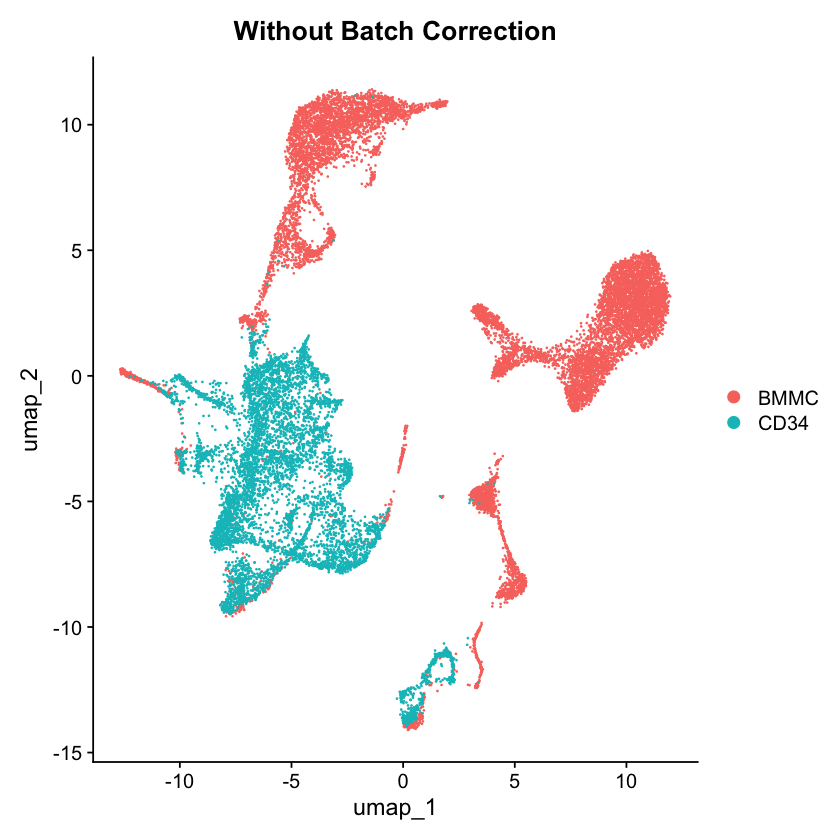

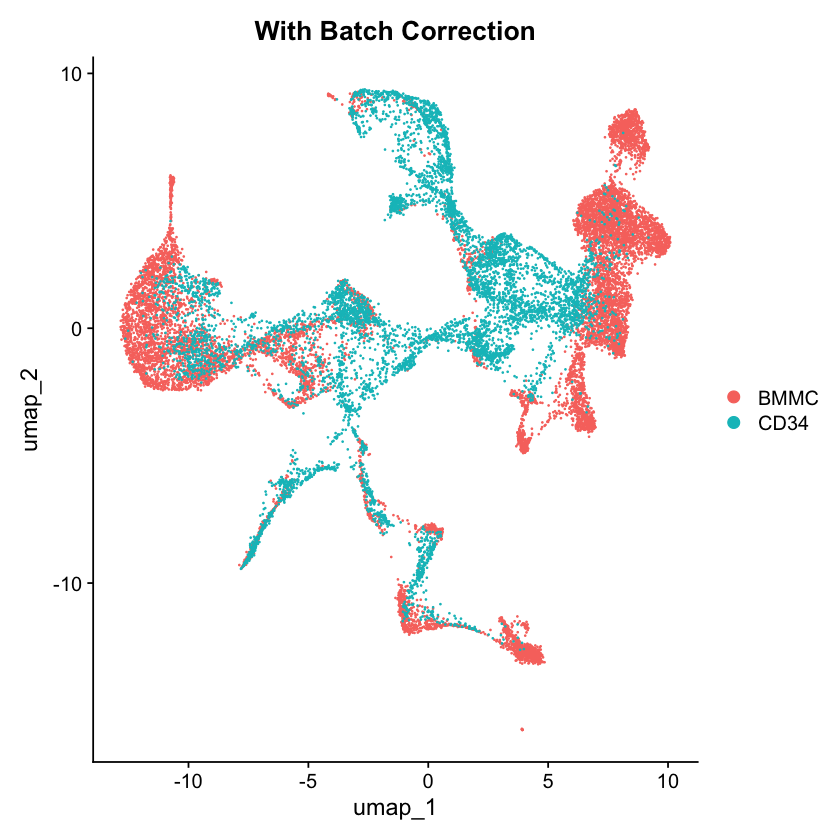

In [33]:
# Plot UMAP for non-corrected data
DimPlot(merged_no_correction, reduction = "umap", group.by = "orig.ident") + ggtitle("Without Batch Correction")

# Plot UMAP for batch-corrected data
DimPlot(merged_with_correction, reduction = "umap", group.by = "orig.ident") + ggtitle("With Batch Correction")


**Compare the outcomes of A and B.**

**Is Batch-Correction necessary? If yes, name the parameters and explain (with the necessary plots) why a correction for this parameter may be necessary.**

Yes, batch correction is necessary in this case. In Plot A (without batch correction), the cells cluster by sample rather than biological similarity, indicating the presence of batch effects. In Plot B (with batch correction), the samples are better integrated, showing that batch effects have been reduced, allowing for more accurate biological interpretation.

### 5 Dimensionality Reduction: (5P)
#### 5.1 Dimensionality Reduction
Perform dimensionality reduction using PCA followed by UMAP, and plot the data in 2-dimensional space.
How did you choose the number of dimensions? Use a plot to explain.
Explain why we use a combination of PCA with UMAP for clustering and not only one of the methods.
#### 5.2 Clustering
Cluster the embedded data and display the results in a two-dimensional plot. Keep the results of the dimensionality
reduction and clustering for the subsequent tasks. You should end up with 7-15 clusters.